<div style = " Text-align: center">
    
# Analisis de Datos Masivos

## Verificacion de velocidades de Internet

### Rodriguez Rivas Jose Gabriel

## Antonio Emmanuel Martinez Rodriguez


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [4]:
df_internet = pd.read_csv('rpi_data_processed.csv')


In [5]:
df_internet.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
Date                 672 non-null object
Time                 672 non-null object
Ping (ms)            672 non-null float64
Download (Mbit/s)    672 non-null float64
Upload (Mbit/s)      672 non-null float64
dtypes: float64(3), object(2)
memory usage: 26.4+ KB


In [8]:
df_internet ['Ping (ms)'] = df_internet ['Ping (ms)'].apply(lambda val: float(val))

df_internet['Download (Mbit/s)'] = df_internet['Download (Mbit/s)'].apply(lambda val: float(val))

In [9]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
Date                 672 non-null object
Time                 672 non-null object
Ping (ms)            672 non-null float64
Download (Mbit/s)    672 non-null float64
Upload (Mbit/s)      672 non-null float64
dtypes: float64(3), object(2)
memory usage: 26.4+ KB


C:\Users\Antonio\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


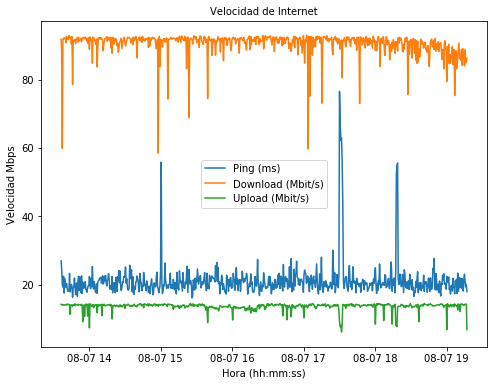

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
t = pd.to_datetime(df_internet['Time'])
ax.plot(t, df_internet['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_internet['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_internet['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.legend()
ax.set_ylabel('Velocidad Mbps', size = 10)
ax.set_xlabel('Hora (hh:mm:ss)', size = 10)
ax.set_title('Velocidad de Internet', size = 10)
ax.tick_params(labelsize=10)

In [13]:
acceptable_upload = 13 
acceptable_download = 88 
acceptable_ping = 20 

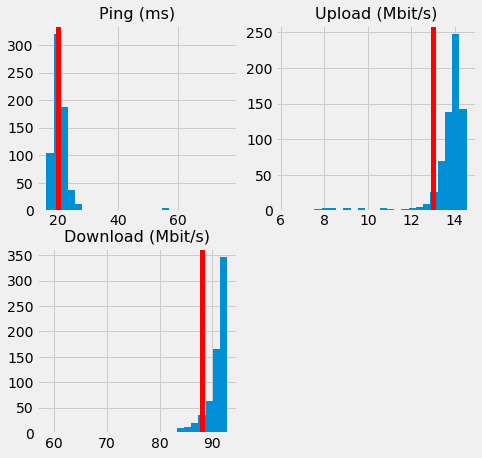

In [15]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(2,2,figsize=(7, 7))
    ax[0][0].hist(df_internet['Ping (ms)'], 25)
    ax[0][0].axvline(acceptable_ping, color='red', linewidth=5)
    ax[0][0].set_title('Ping (ms)', fontsize=16)
    ax[0][1].hist(df_internet['Upload (Mbit/s)'], 25)
    ax[0][1].axvline(acceptable_upload, color='red', linewidth=5)
    ax[0][1].set_title('Upload (Mbit/s)', fontsize=16)
    ax[1][0].hist(df_internet['Download (Mbit/s)'], 25)
    ax[1][0].axvline(acceptable_download, color='red', linewidth=5)
    ax[1][0].set_title('Download (Mbit/s)', fontsize=16)
    ax[1][1].set_visible(False)

In [17]:
means = df_internet.mean()
stands = df_internet.std()

In [18]:
quote_ping = (means['Ping (ms)'], stands['Ping (ms)'])
quote_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
quote_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])


print('tiempo promedio de Download: {} ± {} ms'.format(*quote_download))
print('tiempo promedio de ping: {} ± {} ms'.format(*quote_ping))
print('tiempo promedio de Upload: {} ± {} ms'.format(*quote_upload))
print('')
print('distancia entre la velocidad de download aceptable y la media: {:.2f} desviacion estandar'.format((quote_download[0]-acceptable_download)/quote_download[1]))
print('distancia entre la velocidad de upload aceptable y la media: {:.2f} desviacion estandar'.format((quote_upload[0]-acceptable_upload)/quote_upload[1]))
print('distancia entre la velocidad de ping aceptable y la media: {:.2f} desviacion estandar'.format((quote_ping[0]-acceptable_ping)/quote_ping[1]))



tiempo promedio de Download: 90.45629464285713 ± 3.4633514246179895 ms
tiempo promedio de ping: 21.113875000000007 ± 5.164907779028767 ms
tiempo promedio de Upload: 13.69681547619048 ± 1.0810800645602712 ms

distancia entre la velocidad de download aceptable y la media: 0.71 desviacion estandar
distancia entre la velocidad de upload aceptable y la media: 0.64 desviacion estandar
distancia entre la velocidad de ping aceptable y la media: 0.22 desviacion estandar


In [23]:
print('{:.2f}% de las mediciones son inferiores a la velocidad de descarga aceptable.'.format(np.sum(df_internet['Download (Mbit/s)']<acceptable_download)/float(len(df_internet))*100))
print('{:.2f}% de las mediciones son inferiores a la velocidad de ping aceptable.'.format(np.sum(df_internet['Ping (ms)']<acceptable_ping)/float(len(df_internet))*100))
print('{:.2f}% de las mediciones son inferiores a la velocidad de subida aceptable.'.format(np.sum(df_internet['Upload (Mbit/s)']<acceptable_upload)/float(len(df_internet))*100))



10.86% de las mediciones son inferiores a la velocidad de descarga aceptable.
42.86% de las mediciones son inferiores a la velocidad de ping aceptable.
7.89% de las mediciones son inferiores a la velocidad de subida aceptable.


In [25]:
all_three = np.sum((df_internet['Ping (ms)']<acceptable_ping) & (df_internet['Download (Mbit/s)']<acceptable_download) & (df_internet['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% de las mediciones no son aceptables en tres casos.'.format(all_three/float(len(df_internet))*100))

0.60% de las mediciones no son aceptables en tres casos.


In [26]:
ping_upload = np.sum((df_internet['Ping (ms)']<acceptable_ping) & (df_internet['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% de las mediciones no son aceptables para ping y carga.'.format(ping_upload/float(len(df_internet))*100))
upload_download = np.sum((df_internet['Upload (Mbit/s)']<acceptable_upload) & (df_internet['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% de las mediciones no son aceptables para subida y carga.'.format(upload_download/float(len(df_internet))*100))
ping_download = np.sum((df_internet['Ping (ms)']<acceptable_ping) & (df_internet['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% de las mediciones no son aceptables para ping y descarga.'.format(ping_download/float(len(df_internet))*100))


2.98% de las mediciones no son aceptables para ping y carga.
1.34% de las mediciones no son aceptables para subida y carga.
4.61% de las mediciones no son aceptables para ping y descarga.
